## 1.buatlah dashboard dengan package pywedge dan pandas profiling dengan data botak.csv pada bab machine learning preparation

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd
df=pd.read_csv('/content/gdrive/MyDrive/Bootcamp Data Bangalore/Dataset/botak.csv')

In [ ]:
df.shape

(7835, 13)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7835 entries, 0 to 7834
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   umur           7835 non-null   float64
 1   jenis_kelamin  7827 non-null   object 
 2   pekerjaan      7768 non-null   object 
 3   provinsi       7835 non-null   object 
 4   gaji           7835 non-null   float64
 5   is_menikah     7835 non-null   int64  
 6   is_keturunan   7817 non-null   float64
 7   berat          7835 non-null   float64
 8   tinggi         7835 non-null   float64
 9   sampo          7835 non-null   object 
 10  is_merokok     7835 non-null   int64  
 11  pendidikan     7835 non-null   object 
 12  botak_prob     7835 non-null   float64
dtypes: float64(6), int64(2), object(5)
memory usage: 795.9+ KB


In [ ]:
df.describe()

,umur,gaji,is_menikah,is_keturunan,berat,tinggi,is_merokok,botak_prob
count,7835.000000,7.835000e+03,7835.000000,7817.000000,7835.000000,7835.000000,7835.000000,7835.000000
mean,39.463178,7.189956e+06,0.506701,0.203531,59.512621,158.839612,0.496745,0.439641
std,9.989158,3.393145e+06,0.499987,0.402650,11.676979,7.268341,0.500021,0.194666
min,4.000000,1.500000e+06,0.000000,0.000000,40.000000,131.412317,0.000000,-0.115039
25%,33.000000,4.868362e+06,0.000000,0.000000,51.450513,153.980168,0.000000,0.301574
50%,40.000000,6.452511e+06,1.000000,0.000000,56.984565,158.347147,0.000000,0.420578
75%,46.000000,8.598837e+06,1.000000,0.000000,64.613882,163.075648,1.000000,0.557578
max,75.000000,5.000000e+07,1.000000,1.000000,150.000000,201.829329,1.000000,1.000000


In [ ]:
df.isnull().any()

umur             False
jenis_kelamin     True
pekerjaan         True
provinsi         False
gaji             False
is_menikah       False
is_keturunan      True
berat            False
tinggi           False
sampo            False
is_merokok       False
pendidikan       False
botak_prob       False
dtype: bool

In [ ]:
df.isnull().sum()

umur              0
jenis_kelamin     8
pekerjaan        67
provinsi          0
gaji              0
is_menikah        0
is_keturunan     18
berat             0
tinggi            0
sampo             0
is_merokok        0
pendidikan        0
botak_prob        0
dtype: int64

In [ ]:
df.fillna({'jenis_kelamin':'tidak diketahui'}, inplace=True)
df.fillna({'pekerjaan':'tidak bekerja'}, inplace=True)
df.fillna({'is_keturunan':0}, inplace=True)

In [ ]:
df.isnull().sum()

umur             0
jenis_kelamin    0
pekerjaan        0
provinsi         0
gaji             0
is_menikah       0
is_keturunan     0
berat            0
tinggi           0
sampo            0
is_merokok       0
pendidikan       0
botak_prob       0
dtype: int64

In [ ]:
!pip install pywedge
import pywedge as pw
mc = pw.Pywedge_Charts(df, c=None, y = 'botak_prob')
charts = mc.make_charts()

HTML(value='<h2>Pywedge Make_Charts </h2>')

## 2. interpretasikan / ceritakan dataset tersebut (data story telling)

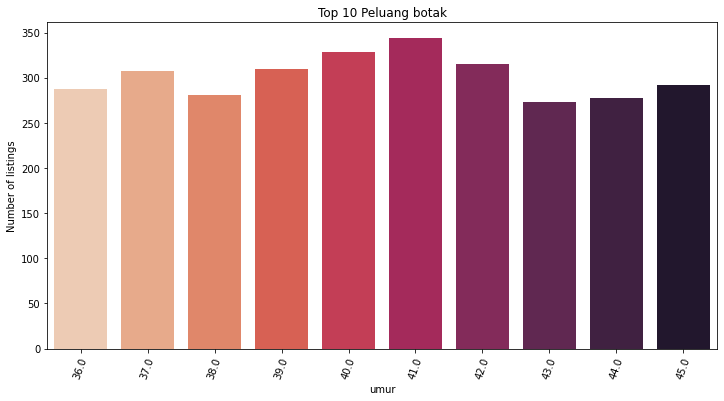

In [ ]:
usia = df.groupby(['umur'])['botak_prob'].count().sort_values(ascending=False).reset_index().head(10)
usia.rename(columns={'botak_prob':'Number of listings'},inplace=True)

plt.figure(figsize=(12, 6));
sns.barplot(usia['umur'],usia['Number of listings'],palette='rocket_r');
plt.title('Top 10 Peluang botak');
plt.xticks(rotation=70);

Data diatas merupakan data ranking 10 besar jumlah orang berdasarkan pengelompokan Usia dan probabilitas botak. Dapat kita lihat yang memiliki peluang terbesar adalah pada usia 41 tahun. 

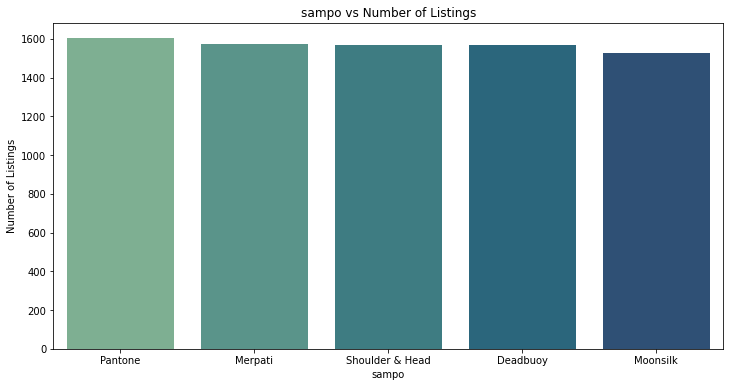

In [ ]:
sampo = df['sampo'].value_counts().reset_index()
sampo.rename(columns={'index':'sampo','sampo':'Number of Listings'},inplace=True)

plt.figure(figsize=(12, 6));
sns.barplot(sampo['sampo'],sampo['Number of Listings'],palette='crest');
plt.title('sampo vs Number of Listings');

Terdapat 5 merek sampo yaitu Pantone, Merpati, Shoulder & Head sampo, Deadbuoy and Moonsik. dapat kita lihat bahwa merek Pantone lebih banyak digunakan dan merek yang paling sedikit digunakan adalah Moonsik.

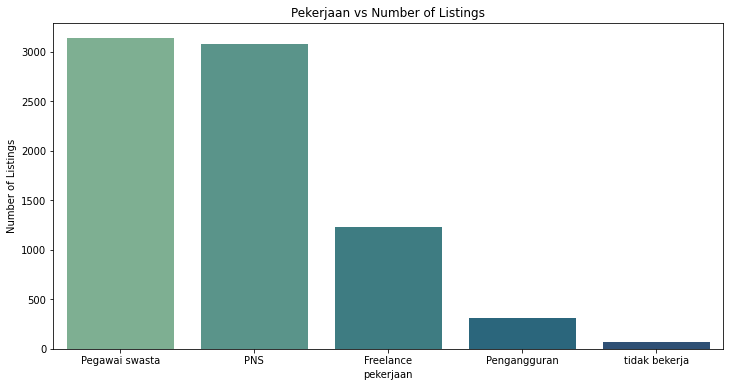

In [ ]:
pekerjaan = df['pekerjaan'].value_counts().reset_index()
pekerjaan.rename(columns={'index':'pekerjaan','pekerjaan':'Number of Listings'},inplace=True)

plt.figure(figsize=(12, 6));
sns.barplot(pekerjaan['pekerjaan'],pekerjaan['Number of Listings'],palette='crest');
plt.title('Pekerjaan vs Number of Listings');

Dari hasil survey yang dilakukan dapat kita ketahui bahwa data survey mayoritas dari Pegawai swasta.

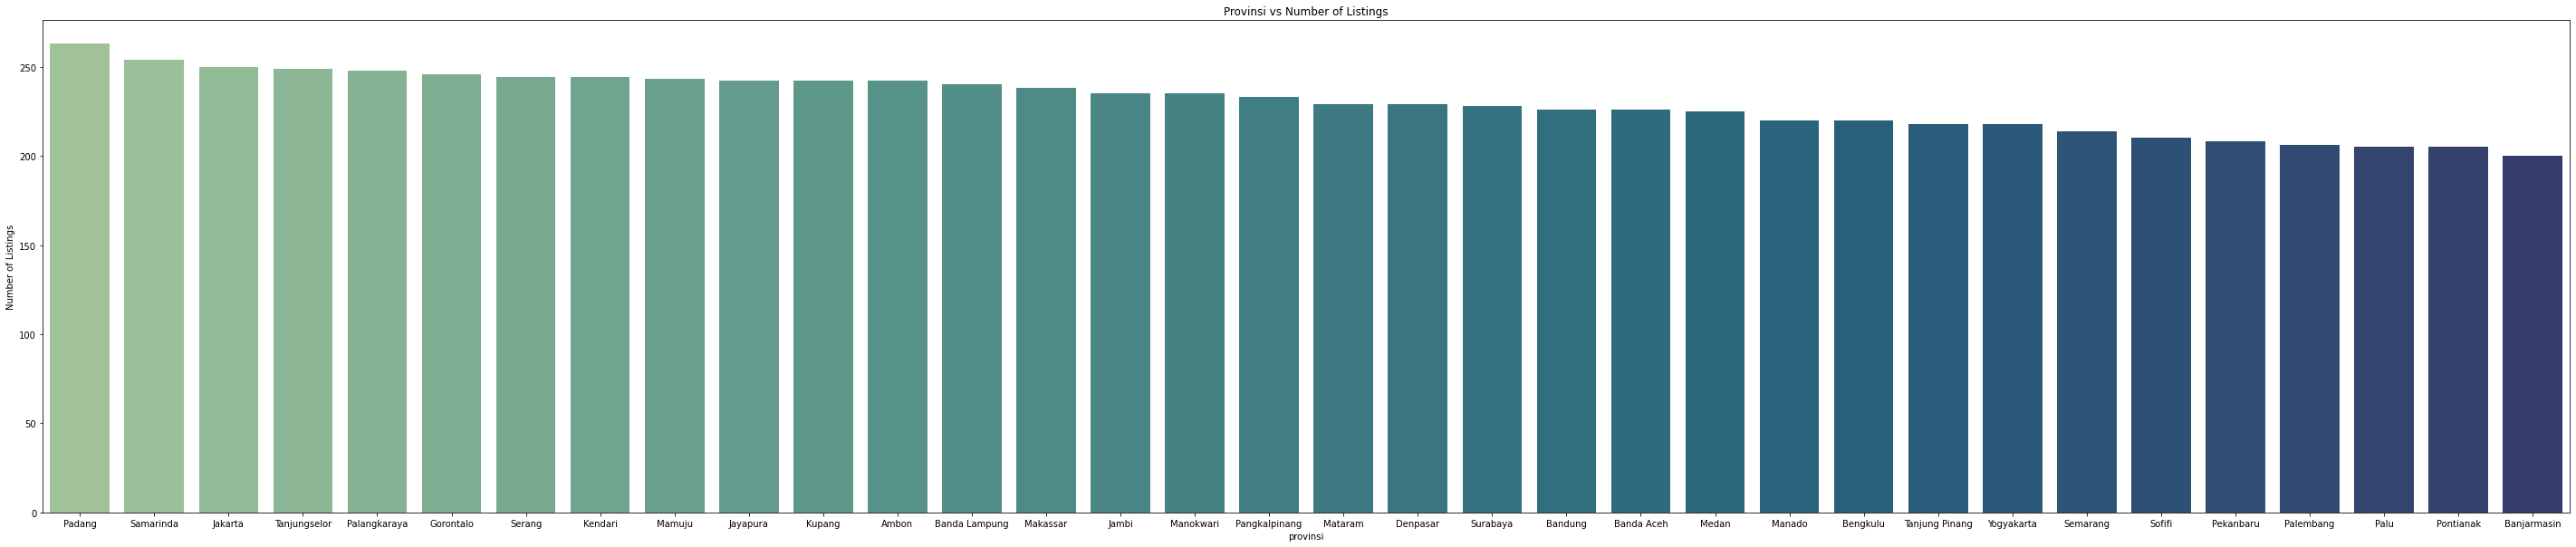

In [ ]:
provinsi = df['provinsi'].value_counts().reset_index()
provinsi.rename(columns={'index':'provinsi','provinsi':'Number of Listings'},inplace=True)

plt.figure(figsize=(50, 10));
sns.barplot(provinsi['provinsi'],provinsi['Number of Listings'],palette='crest');
plt.title('Provinsi vs Number of Listings');

Dari data survey yang didapat dapat kita lihat bahwa data survey banyak didapat dari daerah Padang

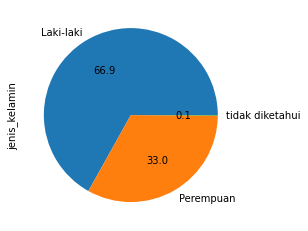

In [ ]:
df['jenis_kelamin'].value_counts(normalize=True).plot(kind='pie', autopct="%.1f")

Dapat kita lihat ternyata sebanyak 66,9% partisipan adalah Laki-laki, sedangkan partisipan perempuan sebanyak 33% dan 0,1% tidak diketahui.